# import library

In [ ]:
pip install geopandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud


%matplotlib inline

In [ ]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [35]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

<b>Confirming 100 unique accounts in dataset</b>

In [36]:
df["account"].nunique()

100

# counting transaction daily

In [37]:
df["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [38]:
df["amount"].value_counts()

33.00    168
39.00    119
29.00    116
36.00    107
45.00    102
        ... 
37.08      1
54.39      1
19.56      1
47.40      1
49.41      1
Name: amount, Length: 4457, dtype: int64

<b> Only retain the relevant features and change the date format</b>

In [39]:
df = df[["status","card_present_flag","balance","date","first_name",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,first_name,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,Diana,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,Diana,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,Michael,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,Rhonda,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,Diana,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [40]:
df.shape

(12043, 12)

<b> correlation among features

In [41]:
corr = df.corr(method='pearson')
corr
# no significant correlation among features

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000


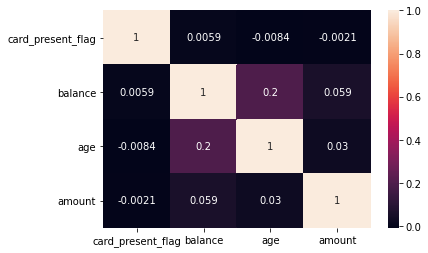

In [83]:
sns.heatmap(corr, annot=True)

# Exploratory Data Analysis

<b>Total Number of Transactions according to date and display the monthly transaction amount in a graph</b>

In [43]:
df_group_date=df.groupby('date')['amount'].sum().reset_index()

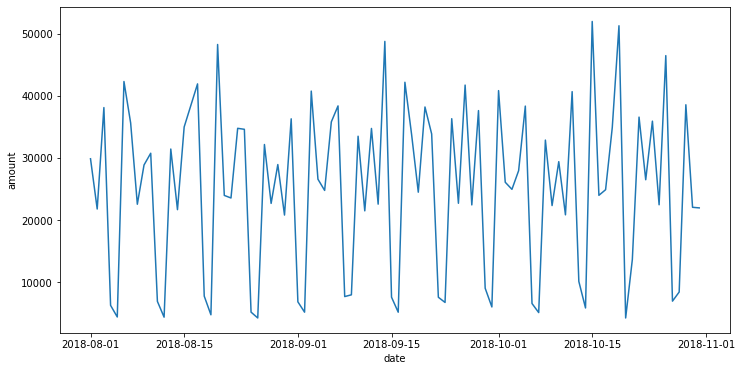

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(y="amount",x="date",data=df_group_date)

<b> Age and Gender

In [45]:
df_group_gender=df.groupby('gender')['amount'].mean().reset_index()
df_group_gender
# The outcome below shows male on average has a higher purchasing power compare to woman.

,gender,amount
0,F,168.517303
1,M,205.721809


In [46]:
age_amount_sum= df.groupby(['age',"gender"])["amount"].sum().reset_index()
age_amount_sum.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


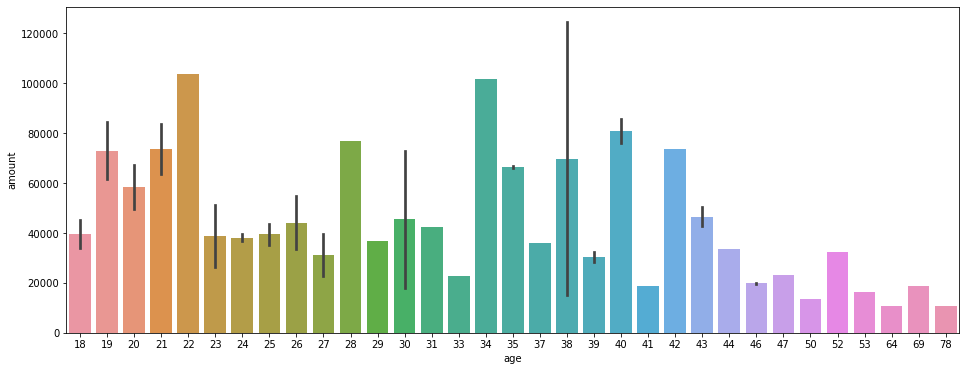

In [47]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_sum)
# can see from here that the younger and mid age group purchase largeer amount

ValueError: Unable to parse string "F" at position 0

<b> Freqency of names

In [48]:
name_freq=df.groupby(["first_name"])["amount"].mean().reset_index()
name_freq

,first_name,amount
0,Abigail,291.293333
1,Alexander,304.375604
2,Amy,119.057581
3,Andrew,318.977941
4,Antonio,192.534870
...,...,...
75,Tim,515.583846
76,Timothy,175.425000
77,Tonya,99.569658
78,Tyler,192.216193


In [49]:
tuple_name = [tuple(x) for x in name_freq.values]


(-0.5, 1399.5, 1199.5, -0.5)

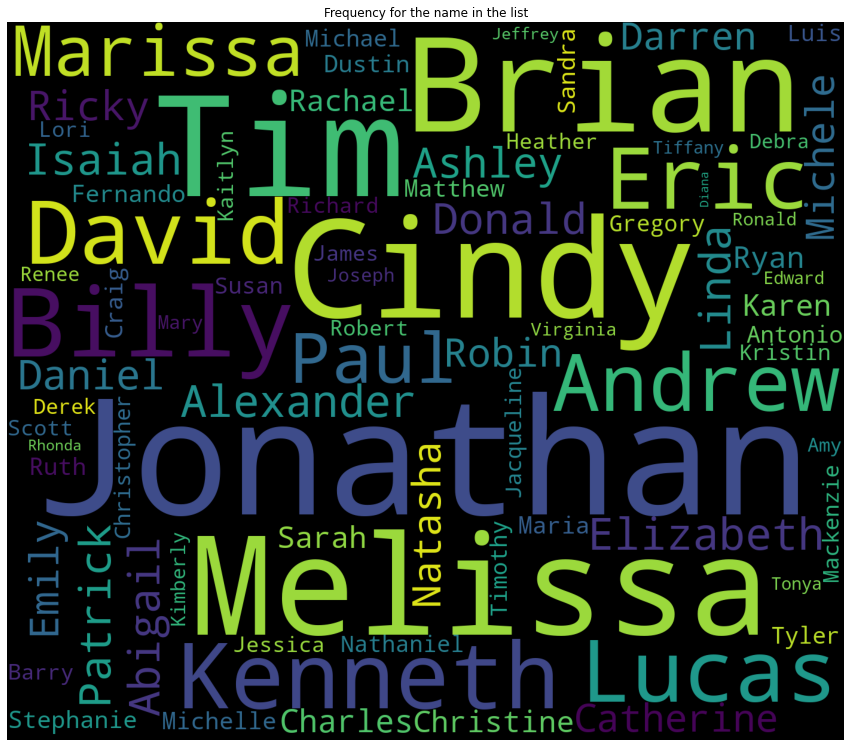

In [50]:
plt.subplots(figsize=(15,15))
wordcloud2 = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_name))
plt.title('Frequency for the name in the list')

plt.imshow(wordcloud2)
plt.axis("off")
# Jonathan, Billy, Tim are the common names with relatively larger transaction

<b> Average transacted amount and balance per gender over time

In [51]:
df_balancegender_mean=df.groupby(['gender','date'])['balance'].mean().reset_index()
df_balancegender_mean

,gender,date,balance
0,F,2018-08-01,8728.854789
1,F,2018-08-02,10258.646232
2,F,2018-08-03,3756.823038
3,F,2018-08-04,4006.868852
4,F,2018-08-05,8672.162750
...,...,...,...
177,M,2018-10-27,22483.151690
178,M,2018-10-28,15199.876081
179,M,2018-10-29,20315.399362
180,M,2018-10-30,16870.702444


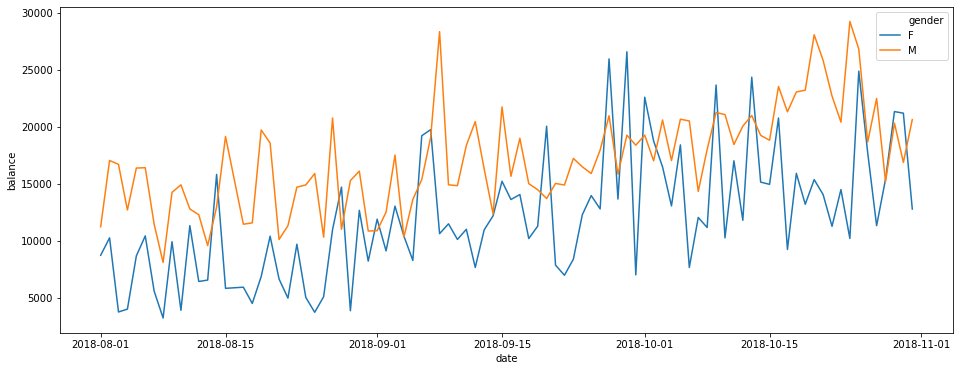

In [52]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue="gender",data=df_balancegender_mean)

In [53]:
df_genderdate_mean=df.groupby(['gender','date'])['amount'].mean().reset_index()
df_genderdate_mean
# The outcome below shows male on average has a higher purchasing power compare to woman.

,gender,date,amount
0,F,2018-08-01,191.952676
1,F,2018-08-02,85.452899
2,F,2018-08-03,216.349241
3,F,2018-08-04,38.179836
4,F,2018-08-05,31.515750
...,...,...,...
177,M,2018-10-27,63.379859
178,M,2018-10-28,65.942838
179,M,2018-10-29,470.635957
180,M,2018-10-30,244.690889


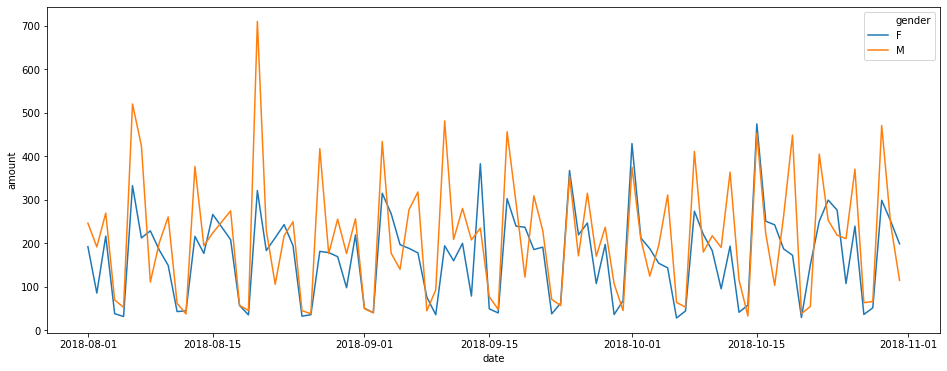

In [65]:
plt.figure(figsize=(16,6))
sns.lineplot(x='date',y='amount',hue='gender',data=df_genderdate_mean)
# from the graph below, it shows the man has a greater volatility over time for the amount purchased

In [66]:
df_gender_sum = df.groupby(['date',"gender"])["amount"].sum().reset_index()
df_gender_sum

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59
...,...,...,...
177,2018-10-29,M,22119.89
178,2018-10-30,F,11051.25
179,2018-10-30,M,11011.09
180,2018-10-31,F,13704.25


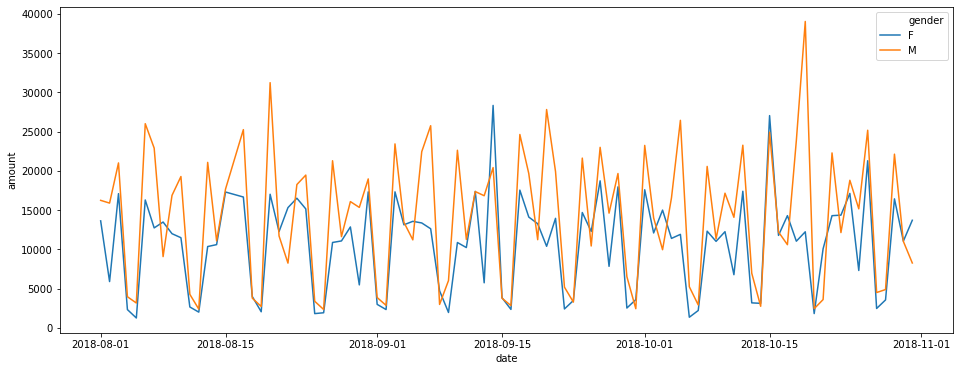

In [67]:
plt.figure(figsize=(16,6))
sns.lineplot(x="date",y='amount',hue='gender',data=df_gender_sum)
# similar to average transaction, the total transacted amount over time by gender also exibit similar pattern

<b> compare age and having a card

In [68]:
pd.crosstab(df['card_present_flag'],df['age'] )

age,18,19,20,21,22,23,24,25,26,27,...,43,44,46,47,50,52,53,64,69,78
card_present_flag,,,,,,,,,,,,,,,,,,,,,
0.0,50,81,102,87,44,29,99,61,141,66,...,56,24,10,8,8,11,9,6,11,0
1.0,210,338,428,384,181,111,459,307,560,250,...,220,64,42,44,23,32,39,53,42,3


<b> Marchant state across time 

In [69]:
df_merchant_sum = df.groupby(['date',"merchant_state"])["amount"].sum().reset_index()
df_merchant_sum

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13
...,...,...,...
611,2018-10-31,QLD,364.08
612,2018-10-31,SA,732.82
613,2018-10-31,TAS,19.18
614,2018-10-31,VIC,700.07


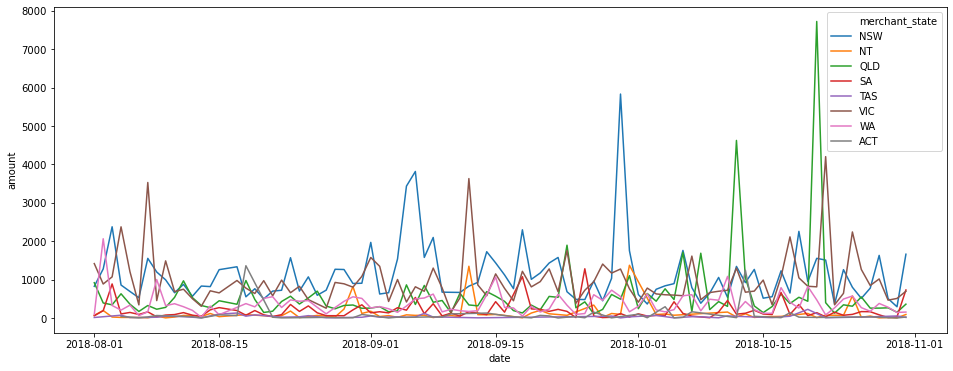

In [70]:
plt.figure(figsize=(16,6))
sns.lineplot(x="date",y='amount',hue='merchant_state',data=df_merchant_sum)

<b> account balance for various merchant state

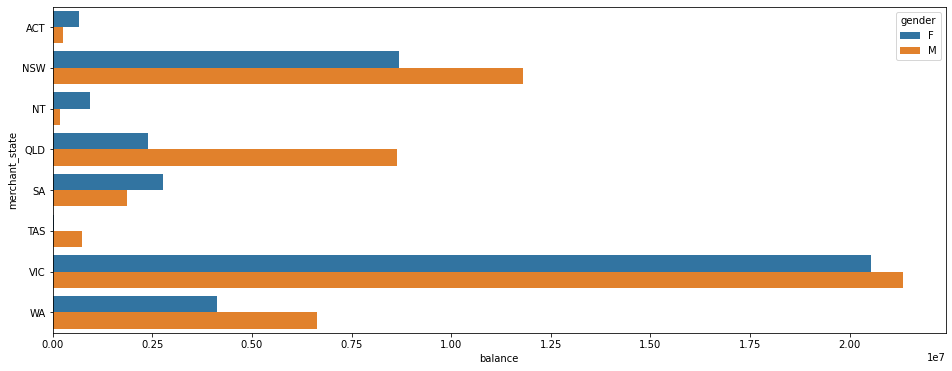

In [71]:
df_merchant_sum = df.groupby(["merchant_state",'gender'])["balance"].sum().reset_index()
df_merchant_sum
plt.figure(figsize=(16,6))
sns.barplot(x="balance",y='merchant_state',hue='gender',data=df_merchant_sum)

<b> Top value merchant per transaction

In [73]:
merchant_suburb_mean= df.groupby(["merchant_suburb"])["amount"].mean().reset_index()
suburb_sorted_mean=merchant_suburb_mean.sort_values(by='amount', ascending=False)


In [74]:
tuple_suburb_mean = [tuple(x) for x in merchant_suburb_mean.values]

(-0.5, 1399.5, 1199.5, -0.5)

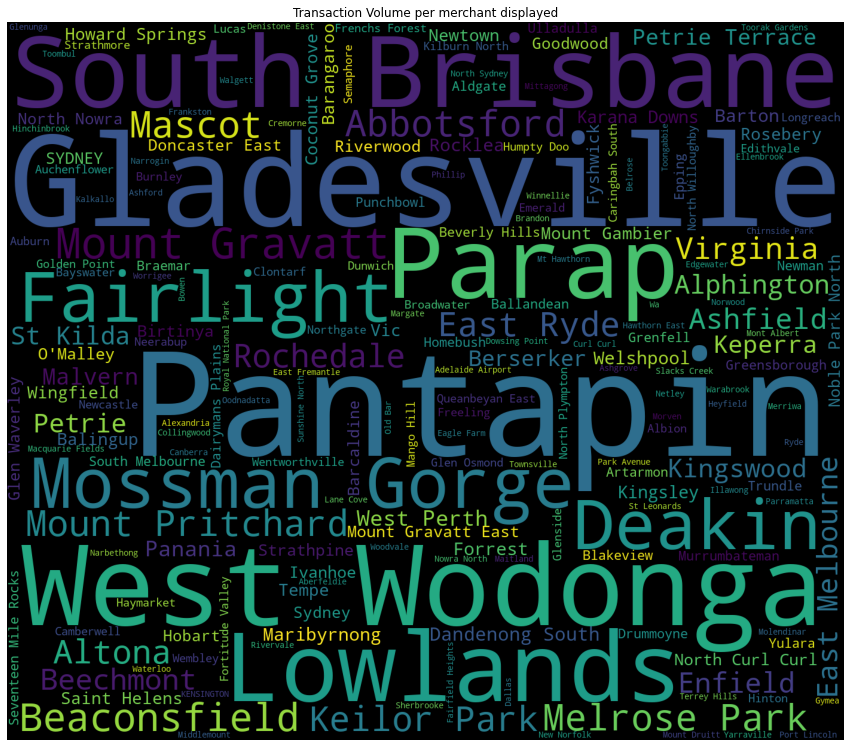

In [75]:
plt.figure(figsize=(15,15))
wordcloud2 = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_suburb_mean))
plt.title('Transaction Volume per merchant displayed')

plt.imshow(wordcloud2)
plt.axis("off")

<b> Average transacted amount on each 'day of month' and 'day of week'

In [76]:
#Function to get date of month
def get_dom(date):
    return date.day

df['day_of_month'] = df['date'].map(get_dom)
df.head()

,status,card_present_flag,balance,date,first_name,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,day_of_month
0,authorized,1.0,35.39,2018-08-01,Diana,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,1
1,authorized,0.0,21.20,2018-08-01,Diana,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,1
2,authorized,1.0,5.71,2018-08-01,Michael,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,1
3,authorized,1.0,2117.22,2018-08-01,Rhonda,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,1
4,authorized,1.0,17.95,2018-08-01,Diana,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,1


Text(0.5, 1.0, 'Number of Transcation w.r.t. dates of month')

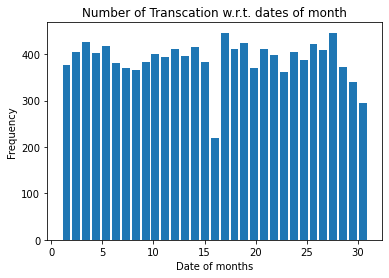

In [77]:
plt.hist(df['day_of_month'], bins = 31, rwidth = 0.8)
plt.xlabel("Date of months")                                        # Less number of transaction during month's end
plt.ylabel("Frequency")
plt.title("Number of Transcation w.r.t. dates of month")
# noted that the frequency of transaction is lowered toward end of the month and comparatively lower during the middle of month. 
# However, the 31th day figure is not representative as not all the months has 31th day.

In [78]:
#Function to gte weekday 

def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)
df.tail()

,status,card_present_flag,balance,date,first_name,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,day_of_month,weekday
12038,authorized,0.0,14054.14,2018-10-31,Melissa,F,30,Ringwood,VIC,9.79,CUS-55310383,debit,31,2
12039,authorized,1.0,9137.79,2018-10-31,Robert,M,20,Casula,NSW,63.87,CUS-2688605418,debit,31,2
12040,authorized,1.0,45394.57,2018-10-31,Craig,M,28,Kings Park,NSW,43.96,CUS-2663907001,debit,31,2
12041,authorized,1.0,11350.67,2018-10-31,Tyler,M,69,Oakleigh,VIC,30.77,CUS-1388323263,debit,31,2
12042,authorized,1.0,5517.91,2018-10-31,Ryan,M,31,Mascot,NSW,22.36,CUS-3129499595,debit,31,2


Text(0.5, 1.0, 'Number of Transcation w.r.t. weekdays')

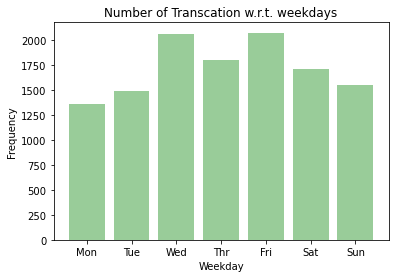

In [79]:
plt.hist(df['weekday'], bins=7, range=(-0.5,6.5), alpha=0.4, color='green', rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')                                                   
plt.title('Number of Transcation w.r.t. weekdays')
 # Maximum transcation on mid-days of week 

In [11]:
data_cust=df[["customer_id","first_name","age","balance",'amount']]
customer=data_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()
customer

<ipython-input-11-612dbe455d7f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer=data_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()


,customer_id,age,first_name,balance,amount
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603
1,CUS-1117979751,21,Lucas,9829.929000,339.843700
2,CUS-1140341822,28,Dustin,5699.212250,212.632500
3,CUS-1147642491,34,Robin,9032.841186,245.600169
4,CUS-1196156254,34,Jessica,22272.433755,147.145796
...,...,...,...,...,...
95,CUS-72755508,35,Kimberly,4497.557069,197.213276
96,CUS-809013380,21,Kaitlyn,3756.902903,151.694274
97,CUS-860700529,30,Jeffrey,3462.276009,77.681888
98,CUS-880898248,26,Robert,8528.830385,146.954487


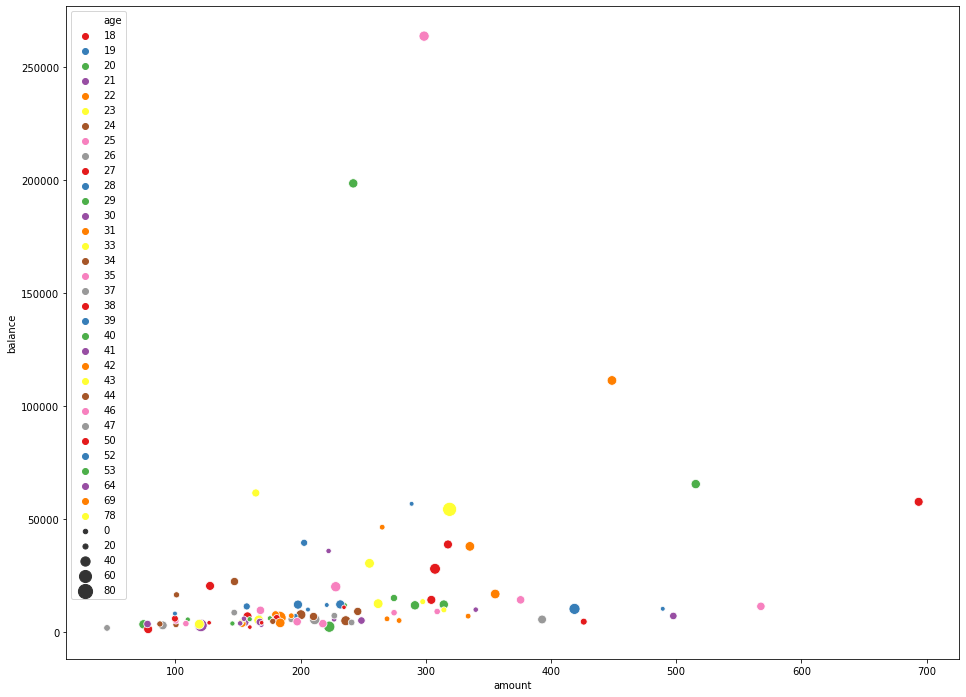

In [13]:
plt.figure(figsize=(16, 12))
sns.scatterplot(y="balance", x="amount",hue="age", palette="Set1", size="age",sizes=(20, 200), data=customer)

# Kmeans practice

In [12]:
#KMeans clustering, Grouping by their mean balance and transaction amount

from sklearn.cluster import KMeans
X=customer[["balance","amount"]].values
X.shape

(100, 2)

In [14]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

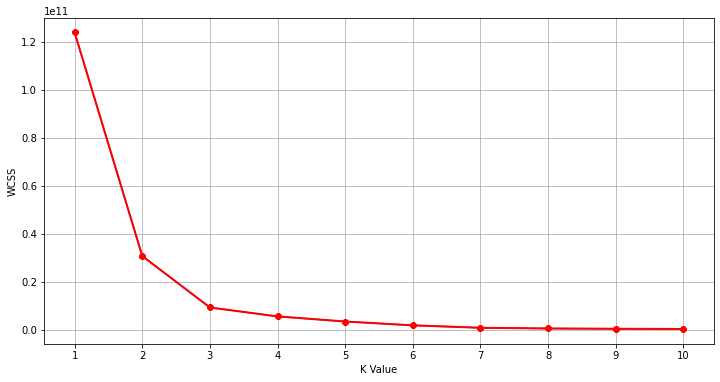

In [15]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [18]:
km1=KMeans(n_clusters=3)
km1.fit(X)

KMeans(n_clusters=3)

In [19]:
y=km1.predict(X)

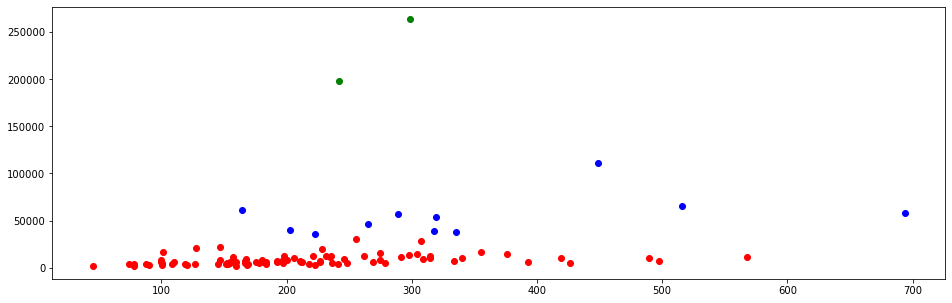

In [20]:
plt.figure(figsize=(16, 5))
plt.scatter(X[y==0,1],X[y==0,0],color='red')
plt.scatter(X[y==1,1],X[y==1,0],color='green')
plt.scatter(X[y==2,1],X[y==2,0],color='blue')


In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
X=customer[["balance","amount","age"]].values
X.shape

(100, 3)

In [ ]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    
    

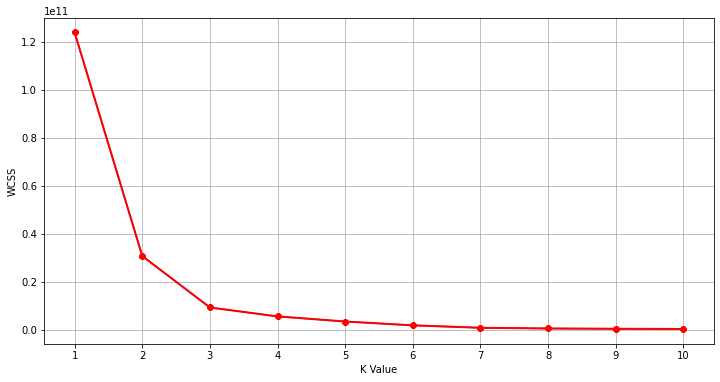

In [26]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [28]:
km2 = KMeans(n_clusters=3)
clusters = km2.fit_predict(X)
customer["label"] = clusters

Text(0.5, 0, 'amount')

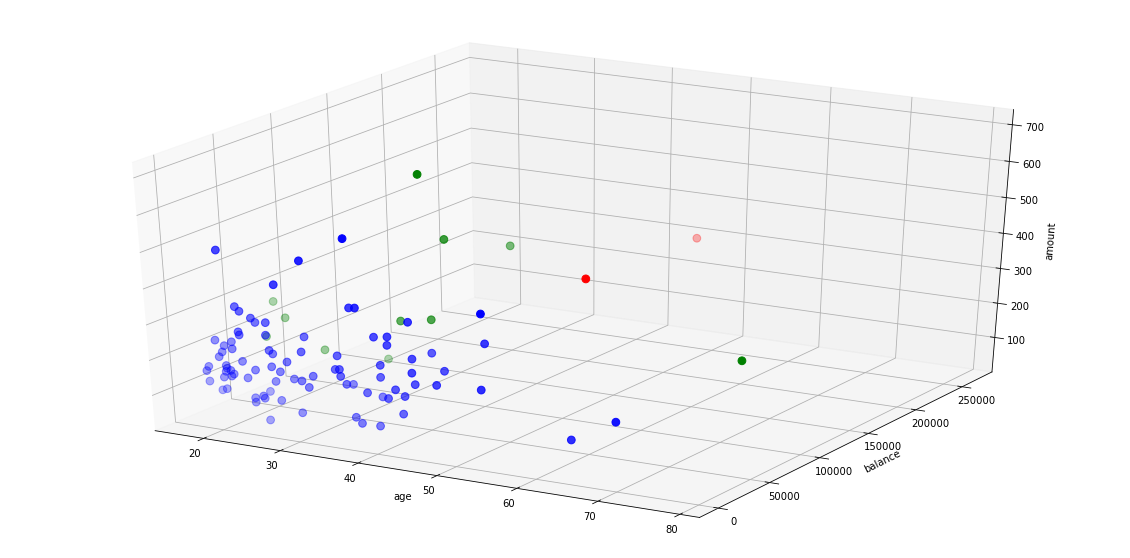

In [29]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.age[customer.label == 0], customer["balance"][customer.label == 0], customer["amount"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.age[customer.label == 1], customer["balance"][customer.label == 1], customer["amount"][customer.label == 1], c='red', s=60)
ax.scatter(customer.age[customer.label == 2], customer["balance"][customer.label == 2], customer["amount"][customer.label == 2], c='green', s=60)
plt.xlabel("age")
plt.ylabel("balance")
ax.set_zlabel('amount')